<a href="https://colab.research.google.com/github/aaryaman11/cs480student/blob/main/04/Copy_of_CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

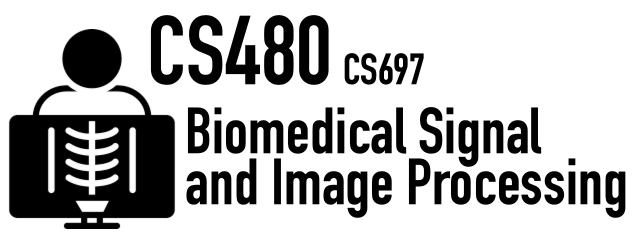
#Assignment 4

In [46]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [47]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [49]:
# we are using mahotas again, so lets install it!
!pip install mahotas

In [50]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [51]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [52]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [53]:
#from google.colab import drive
#drive.mount('/content/drive')

In [54]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [55]:
# TODO: Please display this image and print the dimensions!
# Used this website as a reference to print the dimensions--> https://www.tutorialkart.com/opencv/python/opencv-python-get-image-size/#:~:text=When%20working%20with%20OpenCV%20Python,of%20channels%20for%20each%20pixel.
# Used stackoverflow as a reference to display the image--> https://stackoverflow.com/questions/35286540/display-an-image-with-python  

In [56]:
# TODO: YOUR CODE

(1858, 2090)


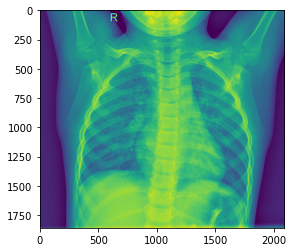

In [57]:
#print(img)
imgplot = plt.imshow(img)
dimensions = img.shape
print(dimensions)
#mh.imshow(img, 'IM-0115-0001.jpeg')

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [58]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [59]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [60]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) YOUR ANSWER
# TODO: Operation 2) YOUR ANSWER

Operation 1- Resizing the image to 300*300 pixel

Operation 2- gathering the data to store pixel in 3D numpy array

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [61]:
# TODO: YOUR CODE
# took inspiration from ishawagh19 to fix my code 

Normal Images

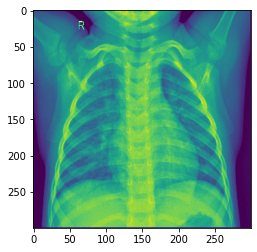

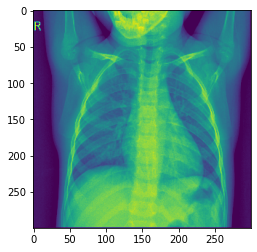

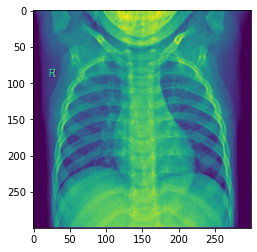

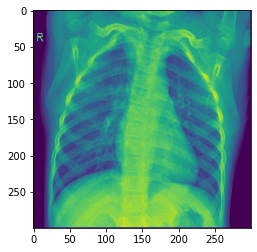

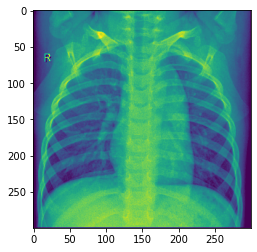

In [62]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def process(image) -> None:
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    plt.figure()
    plt.imshow(image)

# getting normal images
for i in range(5):
  process(normal_images[i])

Getting the Pneumonia images


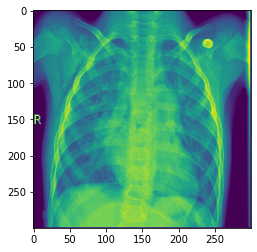

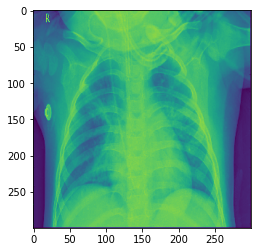

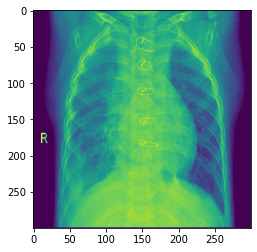

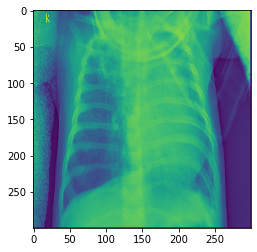

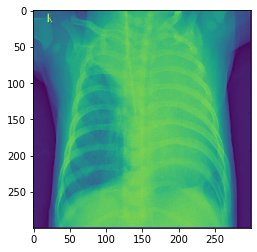

In [63]:
# getting normal images
for i in range(5):
  process(pneumonia_images[i])

**Task 3:** Setup training and testing data. [15 Points]

In [64]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [65]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [66]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
training_target = np.concatenate((np.zeros(TRAINING_COUNT),np.ones(TRAINING_COUNT)))

In [67]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [68]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
testing_normal = np.zeros(TESTING_COUNT)
testing_pneumonia = np.ones(TESTING_COUNT)
testing_target = np.concatenate((testing_normal, testing_pneumonia))

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [69]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [70]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [71]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [72]:
# TODO: YOUR ANSWER

Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

Source: https://www.javatpoint.com/machine-learning-random-forest-algorithm

In [73]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.95

In [ ]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [ ]:
# TODO: YOUR ANSWER

The accuracy is good, but I think it could be better. I am suprised by the result, after noticing the accuracy of the rainforest classifier. The result reinstate the fact that rainforest classifier gives the best prediction based on the votes of majority prediction from each tree.    

**Bonus:** Let's take a closer look! [33 Points]

In [ ]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

In [74]:
# TODO: YOUR CODE AND YOUR ANSWER
predictions = clf.predict(testing_data)
print(predictions)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


The first 40 images were normal from Testing_data and next 40 images were from Pneumonia data set from Testing_data. Clearing there are some 1's --> representing Pneumonia in first 40 images of normal images and the same thing for other 40 images from Pneumonia set where some of them are 0's  representing  normal images. To check which images are  problemetic, we need to get the index number of the images, which are out place to fix them. 

In [ ]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [ ]:
# TODO: YOUR ANSWER

We could use more data to improve accuracy and reduce errors 

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw